# Perturbation analysis

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Array of liklihood ratios
X = np.array([np.exp(1) for i in range(N)])

In [50]:
# parameters
N = 30 # number of observations
epsilon = 1 # perturbation. Its absolute value should not exceed the minimum of X 

In [51]:
def perturb(Y, epsilon, i):
    """
    adds epsilon to the i-th entry of Y
    """
    Z = Y.copy()
    Z[i] += epsilon
    return Z

In [52]:
def y(X):
    """
    sums the log of the entries of X. This is a perfect integrator
    """
    return np.log(X).sum()

In [53]:
def phi(x, h):
    """
    Non-linearity used in the optimal evidence accumulation process
    """
    return ((1 - h) * x + h) / (h * x + 1 - h)

In [54]:
def z(X, h):
    """
    Optimal evidence accumulation process
    """
    N = len(X)
    newphi = phi(X[0], h)
    # print('n=', 1, ' ', newphi)
    n = 2
    while n < N:
        newphi = phi(X[n-1]*newphi, h)
        # print('n=', n, ' ', newphi)
        n += 1
    return np.log(X[-1]) + np.log(newphi)

In [55]:
def errors_y(h):
    return [y(perturb(X, epsilon, i)) - y(X) for i in range(len(X))]
def errors_z(h):
    return [z(perturb(X, epsilon, i), h) - z(X, h) for i in range(len(X))]

Total number of observations 30
perturbation value 1
constant likelihood ratio 2.71828182846


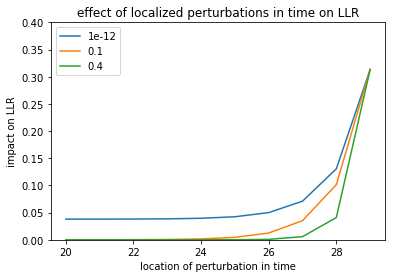

In [56]:
print('Total number of observations',N)
print('perturbation value',epsilon)
print('constant likelihood ratio', np.exp(1))
fig, ax = plt.subplots()
ax.set_ylim([0,.4])
setofh = [0.000000000001,0.1,0.4]
for h in setofh:
    x = range(N)
    ax.plot(x[-10:], errors_z(h)[-10:])

ax.legend(setofh, loc='upper left')
plt.title('effect of localized perturbations in time on LLR')
plt.ylabel('impact on LLR')
plt.xlabel('location of perturbation in time')
plt.show()